# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [215]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [216]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Statements

In [217]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [218]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [219]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 

(4324,9)



* How many rows and columns does it have? 

(4324 rows and 9 columns)



* What are the column names?

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')



* Are there any NaN values or duplicates?

There are some NaN values but no duplicates

-------------------------------

Codes used:

[for question 1]

df_data.shape 


[for question 2]


df_data.columns 


[for question 3]

df_data.isna().values.any()

df_data.duplicated().values.any()

df_data.head()

df_data.isna().value_counts()

In [220]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [221]:
df_data.isna().value_counts()

Unnamed: 0  Unnamed: 0.1  Organisation  Location  Date   Detail  Rocket_Status  Price  Mission_Status
False       False         False         False     False  False   False          True   False             3360
                                                                                False  False              964
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

------------------------------
Code Used:

df_data.dropna(inplace=True)

df_data.head() 

df = pd.DataFrame(df_data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis =1))

df.head()



In [222]:
df_data.dropna(inplace=True)

In [223]:
df = pd.DataFrame(df_data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis =1))

## Descriptive Statistics

------------------------------

Codes Used:

df.describe()

df.info()

In [224]:
df.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,964,964,964,964,964,964,964
unique,25,56,963,962,2,56,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,450.0,Success
freq,158,120,2,2,586,136,910


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    964 non-null    object
 1   Location        964 non-null    object
 2   Date            964 non-null    object
 3   Detail          964 non-null    object
 4   Rocket_Status   964 non-null    object
 5   Price           964 non-null    object
 6   Mission_Status  964 non-null    object
dtypes: object(7)
memory usage: 60.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

-------------------------------------

Codes Used:

df.nunique()

mission_count = df.Organisation.value_counts()

bar_launch = px.bar(

               x= mission_count.index ,

               y= mission_count.values,

               color = mission_count.values,

               color_continuous_scale= 'Aggrnyl',

               title='Space Mission Launches Counts by Organization'
               
               )

bar_launch.update_layout(

             xaxis_title = 'Organization Name',

             yaxis_title = 'Space Mission Launches Count'
             
             )

bar_launch.show()

In [226]:
df.nunique()

mission_count = df.Organisation.value_counts()

bar_launch = px.bar(

           x= mission_count.index ,

           y= mission_count.values,

           color = mission_count.values,

           color_continuous_scale= 'Aggrnyl',

           title='Space Mission Launches Counts by Organization'

           )
bar_launch.update_layout(

         xaxis_title = 'Organization Name',

         yaxis_title = 'Space Mission Launches Count'

         )
bar_launch.show()

In [227]:
bar_launch.update_layout(

         xaxis_title = 'Organization Name',

         yaxis_title = 'Space Mission Launches Count')

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

-----------------------------------------

Codes Used:

df.Rocket_Status.value_counts()

print( f'There are {df.Rocket_Status.value_counts()[0]} Active Rockets and {df.Rocket_Status.value_counts()[1]} Retired Rockets.')


In [228]:
df.Rocket_Status.value_counts()

StatusActive     586
StatusRetired    378
Name: Rocket_Status, dtype: int64

In [229]:
print( f'There are {df.Rocket_Status.value_counts()[0]} Active Rockets and {df.Rocket_Status.value_counts()[1]} Retired Rockets.')

There are 586 Active Rockets and 378 Retired Rockets.


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

-------------------------------------

Codes Used:

df.Mission_Status.value_counts()

print( f'There are {df.Mission_Status.value_counts()[0]} Success Missions and {df.Mission_Status.value_counts()[1]} Failed Missions.')


In [230]:
df.Mission_Status.value_counts()

Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: Mission_Status, dtype: int64

In [231]:
print( f'There are {df.Mission_Status.value_counts()[0]} Success Missions and {df.Mission_Status.value_counts()[1]} Failed Missions.')

There are 910 Success Missions and 36 Failed Missions.


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

-------------------------

Codes Used:

price= df.Price

plt.figure(figsize=(10, 5), dpi=200)

plt.hist(
         
         price, bins= 30,

         rwidth=0.8, color='red'
         
         )

plt.show()


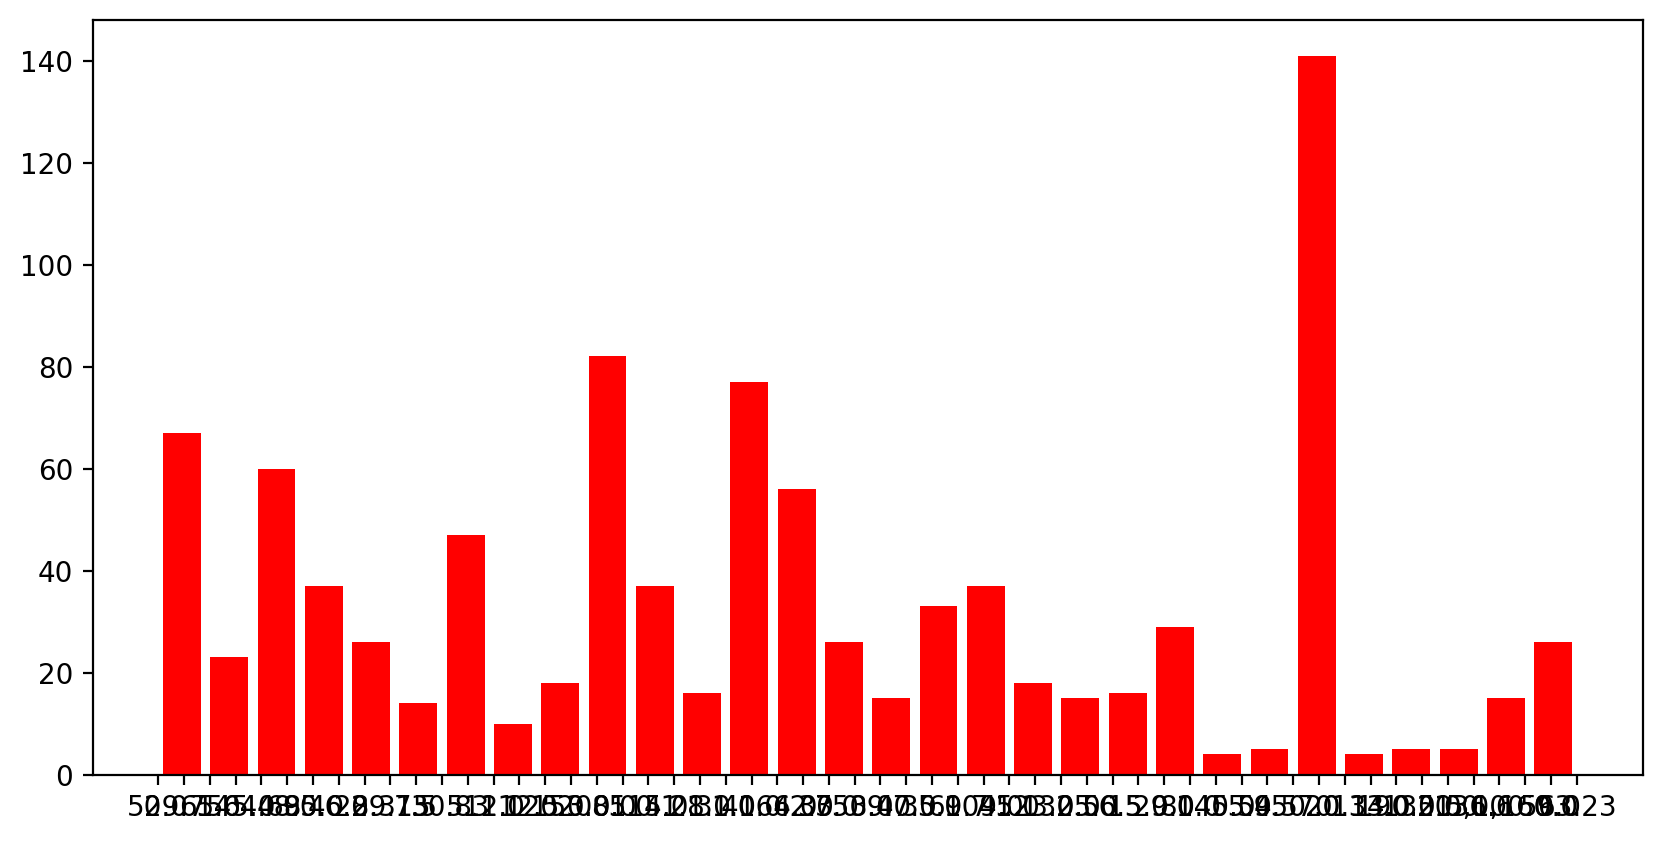

In [232]:
price= df.Price

plt.figure(figsize=(10, 5), dpi=200)

plt.hist(

     price, bins= 30,

     rwidth=0.8, color='red'

     )
plt.show()

(array([ 67.,  23.,  60.,  37.,  26.,  14.,  47.,  10.,  18.,  82.,  37.,
         16.,  77.,  56.,  26.,  15.,  33.,  37.,  18.,  15.,  16.,  29.,
          4.,   5., 141.,   4.,   5.,   5.,  15.,  26.]),
 array([ 0.        ,  1.83333333,  3.66666667,  5.5       ,  7.33333333,
         9.16666667, 11.        , 12.83333333, 14.66666667, 16.5       ,
        18.33333333, 20.16666667, 22.        , 23.83333333, 25.66666667,
        27.5       , 29.33333333, 31.16666667, 33.        , 34.83333333,
        36.66666667, 38.5       , 40.33333333, 42.16666667, 44.        ,
        45.83333333, 47.66666667, 49.5       , 51.33333333, 53.16666667,
        55.        ]),
 <a list of 30 Patch objects>)

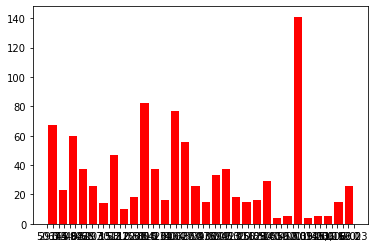

In [233]:
plt.hist(
         price, bins= 30,

         rwidth=0.8, color='red')

In [234]:
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

----------------------------------

Codes Used:

df.Location.value_counts()

df['launch_country'] = df["Location"].str.split(", ").str[-1]


df['launch_country'].replace({
  
                                  'Gran Canaria': 'USA','Yellow Sea': 'China',

                                  'Pacific Missile Range Facility': 'USA', 'Barents Sea': 'Russian Federation',

                                  'Russia': 'Russian Federation', 'Pacific Ocean': 'USA', 'Marshall Islands': 'USA', 'Iran': 'Iran, Islamic Republic of',

                                  'North Korea': "Korea, Democratic People's Republic of", 'South Korea': "Korea, Republic of"
                                  
                                  },

                                  inplace=True
                                  
  )

df['country_ISO_code'] = df['launch_country'].apply(lambda x: (countries.get(x).alpha3))

launch = df.groupby(['launch_country','country_ISO_code'],as_index= False).agg({'Mission_Status': pd.Series.count})

launch.head()


world_map = px.choropleth(
  
                          launch,

                          locations = 'country_ISO_code',

                          color = 'Mission_Status',

                          hover_name= 'launch_country',

                          color_continuous_scale=px.colors.sequential.Teal
                          
)



world_map.update_layout(
  
                        coloraxis_showscale=True,

                        title_text = 'Number of Launches by Country'
                        
)


world_map.show()

In [235]:
df.Location.value_counts()

df['launch_country'] = df["Location"].str.split(", ").str[-1]

df['launch_country'].replace({

                              'Gran Canaria': 'USA','Yellow Sea': 'China',

                              'Pacific Missile Range Facility': 'USA', 'Barents Sea': 'Russian Federation',

                              'Russia': 'Russian Federation', 'Pacific Ocean': 'USA', 'Marshall Islands': 'USA', 'Iran': 'Iran, Islamic Republic of',

                              'North Korea': "Korea, Democratic People's Republic of", 'South Korea': "Korea, Republic of"

                              },

                              inplace=True
)

df['country_ISO_code'] = df['launch_country'].apply(lambda x: (countries.get(x).alpha3))

launch = df.groupby(['launch_country','country_ISO_code'],as_index= False).agg({'Mission_Status': pd.Series.count})

launch.head()

world_map = px.choropleth(

                      launch,

                      locations = 'country_ISO_code',

                      color = 'Mission_Status',

                      hover_name= 'launch_country',

                      color_continuous_scale=px.colors.sequential.Teal
)

world_map.update_layout(

                    coloraxis_showscale=True,

                    title_text = 'Number of Launches by Country'
)

world_map.show()

In [236]:
world_map = px.choropleth(

                      launch,

                      locations = 'country_ISO_code',

                      color = 'Mission_Status',

                      hover_name= 'launch_country',

                      color_continuous_scale=px.colors.sequential.Teal
)

world_map.update_layout(

                    coloraxis_showscale=True,

                    title_text = 'Number of Launches by Country'
)

# Use a Choropleth Map to Show the Number of Failures by Country

------------------------

Codes Used:

failure = df[df.Mission_Status == "Failure"].groupby('country_ISO_code', as_index= False).agg({'Mission_Status': pd.Series.count})

failure



world_map = px.choropleth(
  
                          failure,

                          locations = 'country_ISO_code',

                          color = 'Mission_Status',

                          hover_name= 'country_ISO_code',

                          color_continuous_scale=px.colors.sequential.Cividis
                          
  )



world_map.update_layout(
  
                        coloraxis_showscale=True,

                        title_text = 'Number of Failures by Country'
                        
  )

world_map.show()

In [237]:
failure = df[df.Mission_Status == "Failure"].groupby('country_ISO_code', as_index= False).agg({'Mission_Status': pd.Series.count})

failure

world_map = px.choropleth(

                      failure,

                      locations = 'country_ISO_code',

                      color = 'Mission_Status',

                      hover_name= 'country_ISO_code',

                      color_continuous_scale=px.colors.sequential.Cividis
)

world_map.update_layout(

                    coloraxis_showscale=True,

                    title_text = 'Number of Failures by Country'
)

world_map.show()

In [238]:
world_map.update_layout(

                    coloraxis_showscale=True,

                    title_text = 'Number of Failures by Country'
)

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

-----------------------------------------

Codes Used:

countries_org = df.groupby(by=['launch_country', 'Organisation', 'Mission_Status'],as_index=False).agg({'Price':pd.Series.count})      

countries_org = countries_org.sort_values('Price', ascending=False)

sunburst = px.sunburst(
  
                    countries_org,

                    path = ['launch_country', 'Organisation', 'Mission_Status'],

                    values ='Price',

                    title='Mission overview'

  )


sunburst.show()



In [239]:
countries_org = df.groupby(by=['launch_country', 'Organisation', 'Mission_Status'],as_index=False).agg({'Price':pd.Series.count})

countries_org = countries_org.sort_values('Price', ascending=False)

sunburst = px.sunburst(

                countries_org,

                path = ['launch_country', 'Organisation', 'Mission_Status'],

                values ='Price',

                title='Mission overview'
)

sunburst.show()

In [240]:
sunburst = px.sunburst(

                countries_org,

                path = ['launch_country', 'Organisation', 'Mission_Status'],

                values ='Price',

                title='Mission overview'
)

In [241]:
sunburst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

--------------------------

Codes Used:

df["Price"] = [float(str(i).replace(",", "")) for i in df["Price"]]

price_mean=df['Price'].astype(float).mean()

df['Price'].fillna(price_mean, inplace=True)

df.head()


total_amount = df.groupby(["Organisation"])['Price'].sum()

total_amount.head()


bar_org_spending = px.bar( 
  
                   x= total_amount.index,

                   y= total_amount.values,

                   color= total_amount.values,

                   color_continuous_scale='Aggrnyl',

        title='Total Amount of Money Spent by Organisation on Space Missions'
        
  )


bar_org_spending.update_layout(
  
                    xaxis_title='Organization',

                   # coloraxis_showscale=False,

                    yaxis_title='Money Spent (USD)'
                    
)

bar_org_spending.show()

In [242]:
df["Price"] = [float(str(i).replace(",", "")) for i in df["Price"]]

price_mean=df['Price'].astype(float).mean()

df['Price'].fillna(price_mean, inplace=True)

df.head()


total_amount = df.groupby(["Organisation"])['Price'].sum()

total_amount.head()


bar_org_spending = px.bar( 
  
                   x= total_amount.index,

                   y= total_amount.values,

                   color= total_amount.values,

                   color_continuous_scale='Aggrnyl',

        title='Total Amount of Money Spent by Organisation on Space Missions'
        
  )


bar_org_spending.update_layout(
  
                    xaxis_title='Organization',

                   # coloraxis_showscale=False,

                    yaxis_title='Money Spent (USD)'
                    
)

bar_org_spending.show()

# Analyse the Amount of Money Spent by Organisation per Launch

-------------------------

Codes Used:

launch_org= df.groupby(['Organisation'],as_index= False).agg({'Mission_Status': pd.Series.count})

launch_org.sort_values('Organisation')

launch_org.head()


amount_per_launch = df.groupby(["Organisation"])['Price'].mean()

amount_per_launch


bar_money = px.bar(
  
               x= amount_per_launch.index,

               y= amount_per_launch.values,

               color = amount_per_launch.values,

               title='Amount of Money Spent by Organisation per Launch'

  )


bar_money.update_layout(
  
                    xaxis_title='Organisation',

                   # coloraxis_showscale=False,

                    yaxis_title='Money Spent (USD)'
                    
  )



bar_money.show()

In [243]:
launch_org.sort_values('Organisation')

,Organisation,Mission_Status
0,Arianespace,96
1,Boeing,7
2,CASC,158
3,EER,1
4,ESA,1
5,Eurockot,13
6,ExPace,1
7,ILS,13
8,ISRO,67
9,JAXA,3


In [244]:
amount_per_launch = df.groupby(["Organisation"])['Price'].mean()

In [245]:
launch_org= df.groupby(['Organisation'],as_index= False).agg({'Mission_Status': pd.Series.count})

launch_org.sort_values('Organisation')

launch_org.head()

amount_per_launch = df.groupby(["Organisation"])['Price'].mean()

amount_per_launch

bar_money = px.bar(

           x= amount_per_launch.index,

           y= amount_per_launch.values,

           color = amount_per_launch.values,

           title='Amount of Money Spent by Organisation per Launch'
)

bar_money.update_layout(

                xaxis_title='Organisation',

               # coloraxis_showscale=False,

                yaxis_title='Money Spent (USD)'
)

bar_money.show()

# Chart the Number of Launches per Year

------------------------------

Codes Used:

df['DateTime'] = pd.to_datetime(df["Date"])

df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)

df['Day']= df_data['Date'].apply(lambda date: date.split()[0])

df['Month']= df_data['Date'].apply(lambda date: date.split()[1])

df['Date'] = df_data['Date'].apply(lambda datum: datum.split()[2][:2]).astype(int)

df['Hour']= df_data['Date'].apply(lambda datum: int(datum.split()[-2][:2]) if datum.split()[-1]=='UTC' else np.nan)


plt.figure(figsize=(16,6))

ax = sns.countplot(x=df['Year'])

ax.axes.set_title("Year vs. Launch Counts",fontsize=16)

ax.set_xlabel("Year", fontsize=16)

plt.xticks(rotation=45, ha='right')

ax.set_ylabel("Launch Counts",fontsize=16)

ax.tick_params(labelsize=14)

plt.tight_layout()

plt.show()



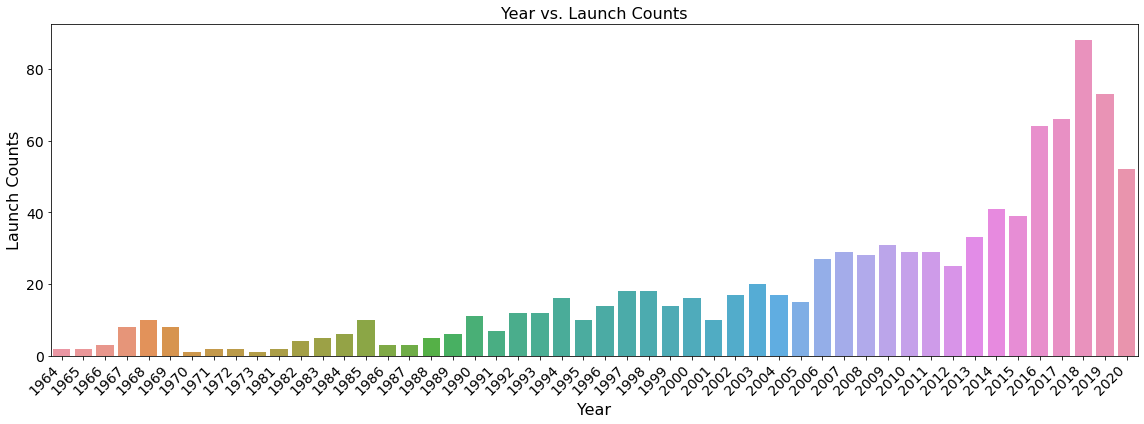

In [246]:
df['DateTime'] = pd.to_datetime(df["Date"])

df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)

df['Day']= df_data['Date'].apply(lambda date: date.split()[0])

df['Month']= df_data['Date'].apply(lambda date: date.split()[1])

df['Date'] = df_data['Date'].apply(lambda datum: datum.split()[2][:2]).astype(int)

df['Hour']= df_data['Date'].apply(lambda datum: int(datum.split()[-2][:2]) if datum.split()[-1]=='UTC' else np.nan)


plt.figure(figsize=(16,6))

ax = sns.countplot(x=df['Year'])

ax.axes.set_title("Year vs. Launch Counts",fontsize=16)

ax.set_xlabel("Year", fontsize=16)

plt.xticks(rotation=45, ha='right')

ax.set_ylabel("Launch Counts",fontsize=16)

ax.tick_params(labelsize=14)

plt.tight_layout()

plt.show()



# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

-------------------------------

Codes Used:

plt.figure(figsize=(20,6))

ax = sns.countplot(x= df['Month'])

ax.axes.set_title("Month vs. Launches Counts",fontsize=14)

ax.set_xlabel("Month", fontsize=16)

plt.xticks(rotation=45, ha='right')

ax.set_ylabel("Launches Counts",fontsize=16)

ax.tick_params(labelsize=12)

plt.tight_layout()

plt.show()

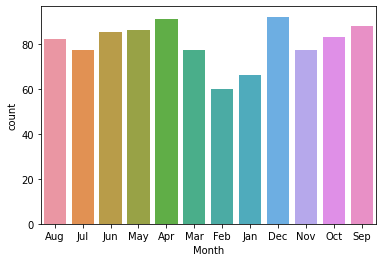

In [247]:
ax = sns.countplot(x= df['Month'])

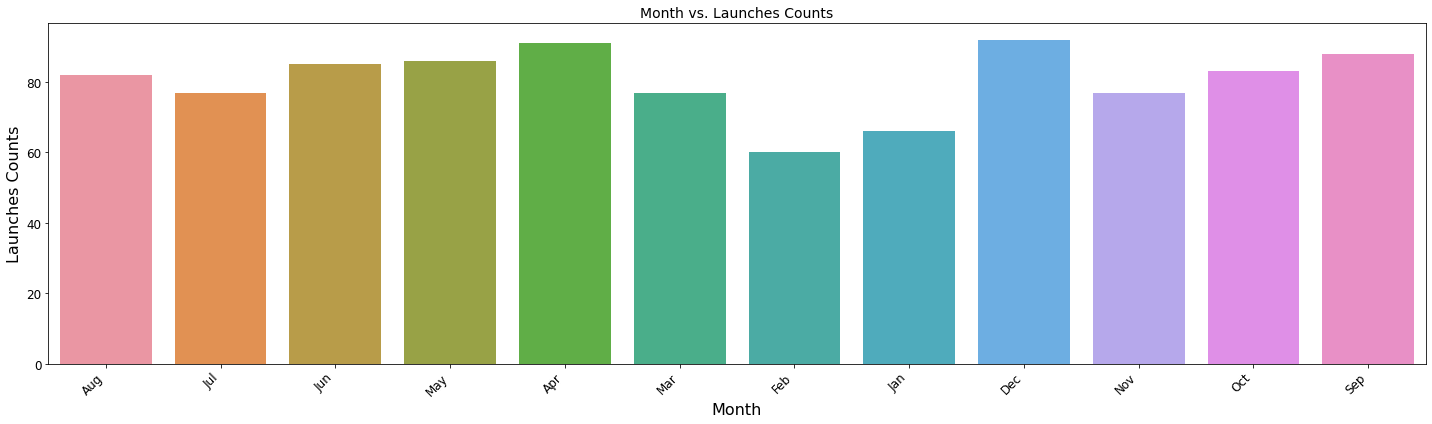

In [248]:
plt.figure(figsize=(20,6))

ax = sns.countplot(x= df['Month'])

ax.axes.set_title("Month vs. Launches Counts",fontsize=14)

ax.set_xlabel("Month", fontsize=16)

plt.xticks(rotation=45, ha='right')

ax.set_ylabel("Launches Counts",fontsize=16)

ax.tick_params(labelsize=12)

plt.tight_layout()

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

-------------------------------

Codes Used:

max_launch= df["Month"].value_counts().max()

min_launch= df["Month"].value_counts().min()

print(f'Max launch is in month of December which is {max_launch} and the Min launch is in the month of February which is {min_launch}.')




In [249]:
min_launch= df["Month"].value_counts().min()

In [250]:
max_launch= df["Month"].value_counts().max()

min_launch= df["Month"].value_counts().min()

print(f'Max launch is in month of December which is {max_launch} and the Min launch is in the month of February which is {min_launch}.')

Max launch is in month of December which is 92 and the Min launch is in the month of February which is 60.


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

--------------------------------

Codes Used:

avg_price_per_year = df.groupby('Year')['Price'].mean()

line_aveprice = px.line(
  
                avg_price_per_year, x=avg_price_per_year.index,

                y=avg_price_per_year.values,

                title='average price of rocket launches'
                
  )

line_aveprice.show()



In [251]:
avg_price_per_year = df.groupby('Year')['Price'].mean()

line_aveprice = px.line(

            avg_price_per_year, x=avg_price_per_year.index,

            y=avg_price_per_year.values,

            title='average price of rocket launches'
)

line_aveprice.show()

In [252]:
line_aveprice.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

--------------------------------

Codes Used:

top10 = df["Organisation"].value_counts().head(11)

top10

top_10 = px.bar(
  
               x = top10.index,

               y= top10.values,

               color= top10.values,

               title = "Launch Counts over Time by the Top 10 Organisations"
               
  )

top_10.update_layout(
  
                     xaxis_title = "Organisation",

                     yaxis_title = "Launch Count",

                     # coloraxis_showscale=False,

)

top_10.show()

In [253]:
top10 = df["Organisation"].value_counts().head(11)

top10

top_10 = px.bar(

           x = top10.index,

           y= top10.values,

           color= top10.values,

           title = "Launch Counts over Time by the Top 10 Organisations"
)

top_10.update_layout(

                 xaxis_title = "Organisation",

                 yaxis_title = "Launch Count",

                 # coloraxis_showscale=False,
)

top_10.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 


--------------------------------

Codes Used:

df.launch_country

df.head(1)


USA = df[df["country_ISO_code"] == 'USA'].count()

USA.Mission_Status



RUS = df[df["country_ISO_code"] == 'RUS'].count()

RUS.Mission_Status

In [254]:
df.launch_country

df.head(1)

USA = df[df["country_ISO_code"] == 'USA'].count()

USA.Mission_Status

RUS = df[df["country_ISO_code"] == 'RUS'].count()

RUS.Mission_Status

54

In [255]:
RUS.Mission_Status

54

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

--------------------------------

Codes Used:

US_RS = df[(df["country_ISO_code"]== 'USA') | (df["country_ISO_code"]== 'RUS') | (df["country_ISO_code"]== 'KAZ')]

grouped = US_RS.groupby(["country_ISO_code"])["Mission_Status"].count()

grouped.values

pie_chart = px.pie(grouped, values=grouped.values, names=grouped.index)

pie_chart.show()



In [256]:
US_RS = df[(df["country_ISO_code"]== 'USA') | (df["country_ISO_code"]== 'RUS') | (df["country_ISO_code"]== 'KAZ')]

grouped = US_RS.groupby(["country_ISO_code"])["Mission_Status"].count()

grouped.values

pie_chart = px.pie(grouped, values=grouped.values, names=grouped.index)

pie_chart.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

--------------------------------

Codes Used:

US_RS = df[(df['country_ISO_code']== 'USA') | (df['country_ISO_code']== 'RUS')]

US_RS.head(1)

plt.figure(figsize=(16,5))

ax = sns.countplot(x='Year',hue="country_ISO_code",data= US_RS)

ax.axes.set_title("Launches Counts Year-On-Year by the Two Superpowers",fontsize=14)

ax.set_xlabel("Year",fontsize=16)

ax.set_ylabel("Launches Counts",fontsize=16)

ax.tick_params(labelsize=12)

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

plt.ylim(0,100)

plt.show()

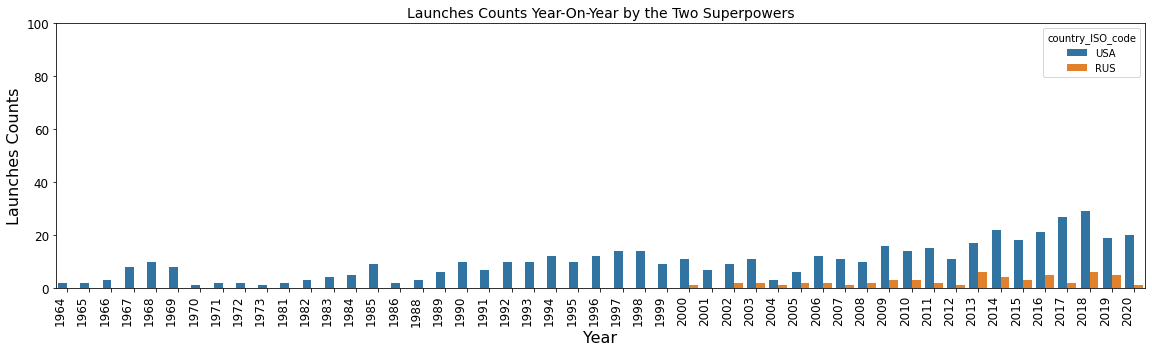

In [257]:
US_RS = df[(df['country_ISO_code']== 'USA') | (df['country_ISO_code']== 'RUS')]

US_RS.head(1)

plt.figure(figsize=(16,5))

ax = sns.countplot(x='Year',hue="country_ISO_code",data= US_RS)

ax.axes.set_title("Launches Counts Year-On-Year by the Two Superpowers",fontsize=14)

ax.set_xlabel("Year",fontsize=16)

ax.set_ylabel("Launches Counts",fontsize=16)

ax.tick_params(labelsize=12)

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

plt.ylim(0,100)

plt.show()

## Chart the Total Number of Mission Failures Year on Year.

--------------------------------

Codes Used:

failure_data = US_RS[(df['Mission_Status'] == 'Failure') | (df['Mission_Status'] == 'Partial Failure')|(df['Mission_Status'] == 'Prelaunch Failure')]

plt.figure(figsize=(10,5))

ax = sns.countplot(x='Year',hue="Mission_Status",data= failure_data)

ax.axes.set_title("Total Number of Mission Failures Year on Year",fontsize=14)

ax.set_xlabel("Year",fontsize=16)

ax.set_ylabel("Launch counts",fontsize=16)

ax.tick_params(labelsize=12)

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

plt.ylim(0,3)

plt.show()

<ipython-input-258-3c863fffde94>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



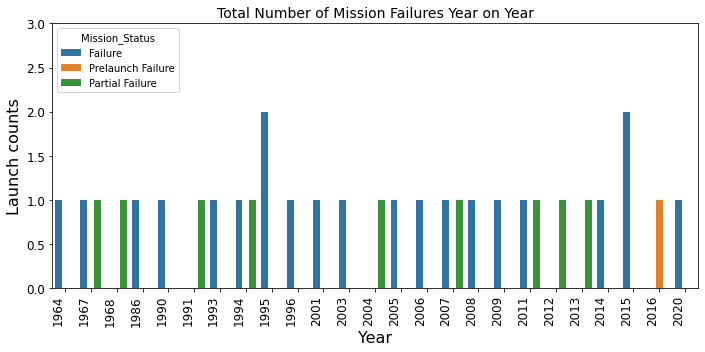

In [258]:
failure_data = US_RS[(df['Mission_Status'] == 'Failure') | (df['Mission_Status'] == 'Partial Failure')|(df['Mission_Status'] == 'Prelaunch Failure')]

plt.figure(figsize=(10,5))

ax = sns.countplot(x='Year',hue="Mission_Status",data= failure_data)

ax.axes.set_title("Total Number of Mission Failures Year on Year",fontsize=14)

ax.set_xlabel("Year",fontsize=16)

ax.set_ylabel("Launch counts",fontsize=16)

ax.tick_params(labelsize=12)

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

plt.ylim(0,3)

plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

--------------------------------

Codes Used:

failure_pct = pd.DataFrame(failure_data.groupby(['Year'])["Mission_Status"].value_counts())

failure_pct = failure_pct.reset_index(level =[0,0])

failure_pct

x = pd.DataFrame(failure_data.groupby(['Year'])['Mission_Status'].sum())

x = x.reset_index(level=[0,0])


plt.figure(figsize=(16,8))

plt.bar(x['Year'], x['Mission_Status'])

plt.xticks(x['Year'], rotation=90)

plt.xlabel('Year')

plt.ylabel('Percentage of Failures')



plt.show()

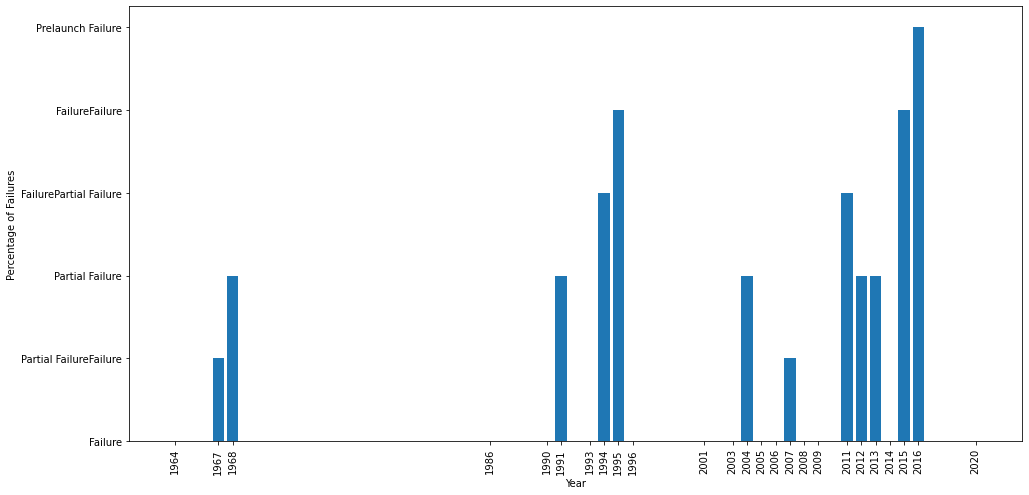

In [259]:
failure_pct = pd.DataFrame(failure_data.groupby(['Year'])["Mission_Status"].value_counts())

failure_pct = failure_pct.reset_index(level =[0,0])

failure_pct

x = pd.DataFrame(failure_data.groupby(['Year'])['Mission_Status'].sum())

x = x.reset_index(level=[0,0])

plt.figure(figsize=(16,8))

plt.bar(x['Year'], x['Mission_Status'])

plt.xticks(x['Year'], rotation=90)

plt.xlabel('Year')

plt.ylabel('Percentage of Failures')

plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

--------------------------------

Codes Used:

country_launches = df_data.groupby("year")["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')

country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]
country_launches.head()

In [261]:
country_launches = df_data.groupby("year")["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')

country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]
country_launches.head()



KeyError: ignored

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

--------------------------------

Codes Used:

organisation_df = pd.DataFrame(df.groupby(["Organisation", "Year"])["launch_country"].count())

organisation_df = organisation_df.reset_index(level=[0,1])

organisation_df

bar_most_launch = px.bar(organisation_df, x='Year', y='launch_country', color ='Organisation')

bar_most_launch.show()

In [262]:
organisation_df = pd.DataFrame(df.groupby(["Organisation", "Year"])["launch_country"].count())

organisation_df = organisation_df.reset_index(level=[0,1])

organisation_df

bar_most_launch = px.bar(organisation_df, x='Year', y='launch_country', color ='Organisation')

bar_most_launch.show()